In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from PIL import Image
from itertools import product
from typing import Optional, List, Dict
import IPython

NOTEBOOK_PATH: Path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
PROJECT_DIR: Path = NOTEBOOK_PATH.parent.parent
os.chdir(PROJECT_DIR)

import src.utils.json_util as json_util
from src._StandardNames import StandardNames
from src.utils.set_rcparams import set_rcparams

B_DIR: Path = Path("models")
print(B_DIR, B_DIR.is_dir())

FIG_DIR: Path = PROJECT_DIR / "reports" / "figures"
FIG_DIR /= NOTEBOOK_PATH.stem
FIG_DIR.mkdir(parents=True, exist_ok=True)


STR: StandardNames = StandardNames()
set_rcparams()
FULL_WIDTH: float = 448.13095 / 72 - 0.2

models True


In [2]:
RENAMER: Dict[str, str] = {
    "Chest_Deflection": "CDC",
    "Chest_VC": "CVC",
    "Chest_a3ms": "CAC$_3$",
    "Femur_Fz_Max_Compression": "FCC",
    "Head_HIC15": "HIC$_{15}$",
    "Head_a3ms": "HAC$_3$",
    "Neck_Fx_Shear_Max": "NSC",
    "Neck_Fz_Max_Tension": "NTC",
    "Neck_My_Extension": "NEC",
}
SHARE_COLS: List[str] = [
    "Head_HIC15",
    "Head_a3ms",
    "Neck_My_Extension",
    "Neck_Fz_Max_Tension",
    "Neck_Fx_Shear_Max",
    "Chest_Deflection",
    "Chest_VC",
    "Chest_a3ms",
    "Femur_Fz_Max_Compression",
]

In [3]:
def load_loop(l_dir: Path, perc: Optional[int] = None, rel_cols: Optional[List[str]] = None, eval_pos: int = -1) -> pd.DataFrame:
    print(l_dir, l_dir.is_dir(), STR.fname_results_csv)
    if perc is None:
        cases = sorted(l_dir.rglob(STR.fname_results_csv))
    else:
        cases = sorted(x for x in l_dir.rglob(STR.fname_results_csv) if f"{perc:02d}HIII" in x.parent.stem)
    print(f"Found {len(cases)} cases")
    results = {}
    for case in tqdm(cases):
        n_samples = len(json_util.load(f_path=case.parent / STR.fname_para)[STR.id])
        results[n_samples] = pd.read_csv(case, index_col=[0, 1]).iloc[eval_pos]

    results = pd.DataFrame(results).T
    results.index.name = "n_samples"
    results.sort_index(inplace=True)
    print(sorted(results.columns))

    if rel_cols is None:
        rel_cols = sorted(results.columns)

    fig, ax = plt.subplots()
    for col in rel_cols:
        ax.plot(results.index, results[col], label=col, alpha=0.3, marker=".")
    ax.plot(results.index, results[rel_cols].mean(axis=1), label="Mean", c="black", lw=2, marker=".")
    ax.legend()
    ax.axhline(0, color="black", lw=0.5)
    ax.axhline(1, color="black", lw=0.5)
    ax.set_xlabel("n_samples")
    ax.set_ylabel("R²")
    ax.set_ylim([0, 1])

    # ax.set_title(f"{perc:02d}HIII" if perc is not None else "")
    ax.grid()

    return results[rel_cols]

0it [00:00, ?it/s]

KeyError: 'Head_HIC15'

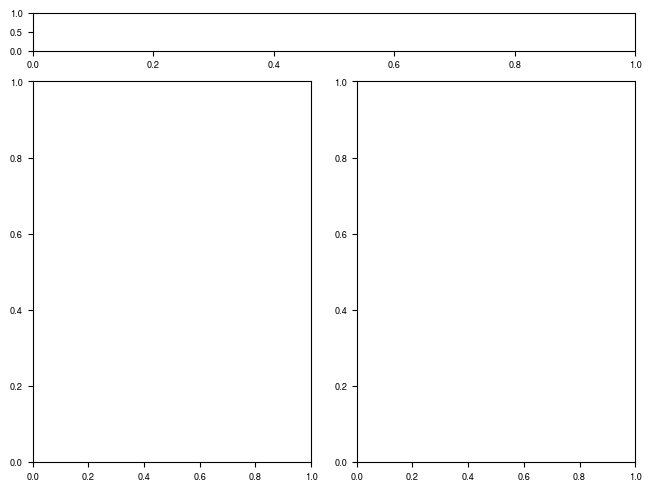

In [4]:
def plot_loop(l_dir: Path, rel_cols: Optional[List[str]] = None, eval_pos: int = -1):
    fig, ax = plt.subplot_mosaic(mosaic=[["L", "L"], [5, 95]], layout="constrained", height_ratios=[0.1, 1])

    for perc in [5, 95]:
        cases = sorted(x for x in l_dir.rglob(STR.fname_results_csv) if f"{perc:02d}HIII" in x.parent.stem)
        results = {}
        for case in tqdm(cases):
            n_samples = len(json_util.load(f_path=case.parent / STR.fname_para)[STR.id])
            results[n_samples] = pd.read_csv(case, index_col=[0, 1]).iloc[eval_pos]

        results = pd.DataFrame(results).T
        results.index.name = "n_samples"
        results.sort_index(inplace=True)

        if rel_cols is None:
            rel_cols = sorted(results.columns)

        
        for col in rel_cols:
            ax[perc].plot(results.index, results[col], label=RENAMER[col], marker=".", lw=0.5, markersize=1)
        ax[perc].plot(results.index, results[rel_cols].mean(axis=1), label="Mean", c="black", lw=1.5, marker=".", markersize=7, alpha=0.8)
        
        ax[perc].axhline(0, color="black", lw=0.5)
        ax[perc].axhline(1, color="black", lw=0.5)
        ax[perc].set_xlabel("Number of Instances")
        
        ax[perc].set_ylim([0, 1])

        ax[perc].set_title(f"HIII-{perc:02d}{'F' if perc == 5 else 'M'}")
        ax[perc].grid()

    ax[5].set_ylabel("R2-score")
    ax[95].set_yticklabels([])
    ax["L"].axis("off")
    ax["L"].legend(*ax[5].get_legend_handles_labels(), loc="center", ncol=5)

    fig.set_figwidth(FULL_WIDTH)
    fig.set_figheight(FULL_WIDTH * 0.5)

    fig.savefig(FIG_DIR / "sobol_size.pdf")


plot_loop(l_dir=B_DIR / "CNN" / "Sobol_Size", rel_cols=SHARE_COLS)

experiments/models/CNN/AdaptiveDOE/2024-12-16-13-27-04_knn_sampler_AnnUniversal_perc5 True results.csv
Found 126 cases


100%|██████████| 126/126 [00:00<00:00, 581.04it/s]


['Chest_Deflection', 'Chest_VC', 'Chest_a3ms', 'Femur_Fz_Max_Compression', 'Head_HIC15', 'Head_a3ms', 'Neck_Fx_Shear_Max', 'Neck_Fz_Max_Tension', 'Neck_My_Extension']
experiments/models/CNN/AdaptiveDOE/2024-12-16-13-27-04_knn_sampler_AnnUniversal_perc5 True results.csv
Found 126 cases


100%|██████████| 126/126 [00:00<00:00, 485.16it/s]


['Chest_Deflection', 'Chest_VC', 'Chest_a3ms', 'Femur_Fz_Max_Compression', 'Head_HIC15', 'Head_a3ms', 'Neck_Fx_Shear_Max', 'Neck_Fz_Max_Tension', 'Neck_My_Extension']


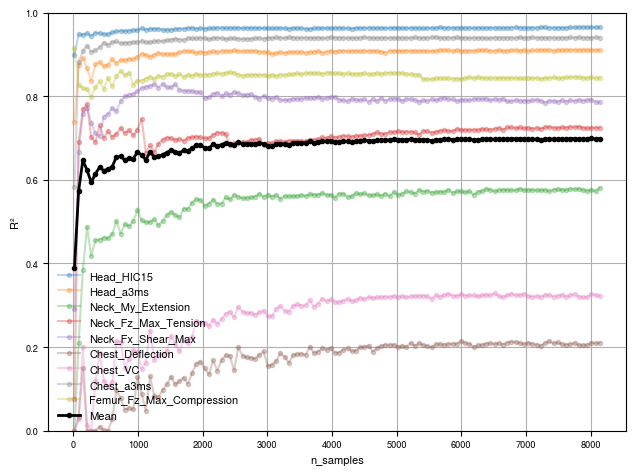

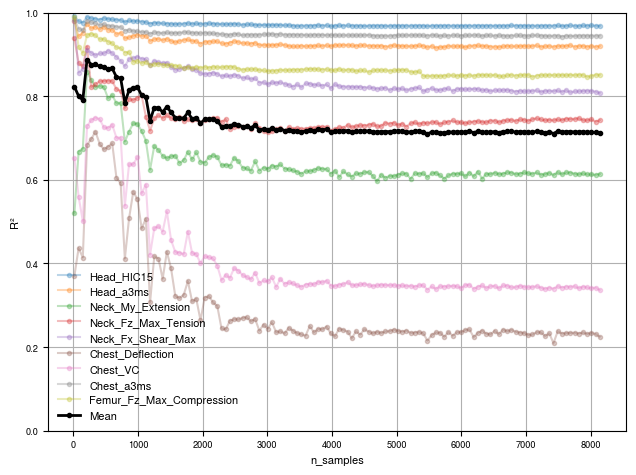

In [12]:
sobol_size_5 = load_loop(l_dir=Path("experiments/models/CNN/AdaptiveDOE/2024-12-16-13-27-04_knn_sampler_AnnUniversal_perc5"), rel_cols=SHARE_COLS)
sobol_size_5_train = load_loop(l_dir=Path("experiments/models/CNN/AdaptiveDOE/2024-12-16-13-27-04_knn_sampler_AnnUniversal_perc5"), rel_cols=SHARE_COLS, eval_pos=-2)

In [23]:
sobol_size_5.index

Index([  16,   81,  146,  211,  276,  341,  406,  471,  536,  601,
       ...
       7556, 7621, 7686, 7751, 7816, 7881, 7946, 8011, 8076, 8141],
      dtype='int64', name='n_samples', length=126)

In [22]:
300/60

5.0

experiments/2025-01-03-11-10-00_knn_sampler_AnnUniversal_perc95 True results.csv
Found 37 cases


100%|██████████| 37/37 [00:00<00:00, 116.86it/s]


['Chest_Deflection', 'Chest_VC', 'Chest_a3ms', 'Femur_Fz_Max_Compression', 'Head_HIC15', 'Head_a3ms', 'Neck_Fx_Shear_Max', 'Neck_Fz_Max_Tension', 'Neck_My_Extension']
experiments/2025-01-03-11-10-00_knn_sampler_AnnUniversal_perc95 True results.csv
Found 37 cases


100%|██████████| 37/37 [00:00<00:00, 512.16it/s]

['Chest_Deflection', 'Chest_VC', 'Chest_a3ms', 'Femur_Fz_Max_Compression', 'Head_HIC15', 'Head_a3ms', 'Neck_Fx_Shear_Max', 'Neck_Fz_Max_Tension', 'Neck_My_Extension']


,Head_HIC15,Head_a3ms,Neck_My_Extension,Neck_Fz_Max_Tension,Neck_Fx_Shear_Max,Chest_Deflection,Chest_VC,Chest_a3ms,Femur_Fz_Max_Compression
n_samples,,,,,,,,,
16,0.518945,0.503723,0.946084,0.756194,0.892525,0.953083,0.838625,0.981938,0.987273
241,0.974319,0.968701,0.968737,0.989699,0.991780,0.980330,0.978849,0.961861,0.963221
466,0.972804,0.966858,0.959890,0.982370,0.973351,0.960716,0.962248,0.957541,0.947635
691,0.974525,0.959292,0.960772,0.978798,0.980029,0.954050,0.957755,0.956717,0.950593
916,0.973873,0.961365,0.956120,0.963920,0.964173,0.953820,0.957131,0.954518,0.944362
1141,0.966289,0.956729,0.947210,0.958471,0.948140,0.944989,0.949711,0.943166,0.937878
1366,0.962733,0.952074,0.944259,0.959741,0.948149,0.937875,0.946938,0.941864,0.935512
1591,0.957435,0.944165,0.942870,0.959257,0.943985,0.938547,0.943007,0.938316,0.933795
1816,0.956395,0.945594,0.940169,0.957041,0.938445,0.934491,0.941710,0.933308,0.930276


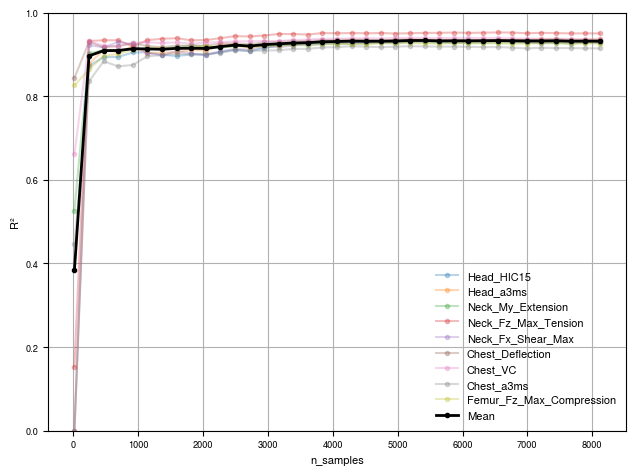

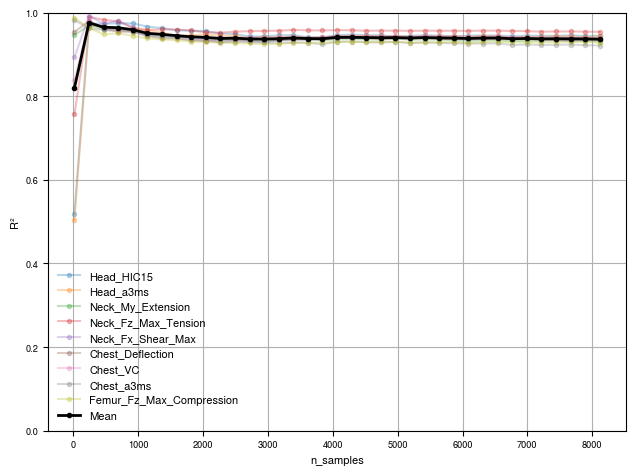

In [6]:
load_loop(l_dir=Path("experiments/2025-01-03-11-10-00_knn_sampler_AnnUniversal_perc95"), rel_cols=SHARE_COLS)
load_loop(l_dir=Path("experiments/2025-01-03-11-10-00_knn_sampler_AnnUniversal_perc95"), rel_cols=SHARE_COLS, eval_pos=-2)

experiments/models/CNN/AdaptiveDOE/2024-12-27-18-53-00_knn_sampler_AnnUniversal_perc95 True results.csv
Found 28 cases


100%|██████████| 28/28 [00:00<00:00, 415.21it/s]


['Chest_Deflection', 'Chest_VC', 'Chest_a3ms', 'Femur_Fz_Max_Compression', 'Head_HIC15', 'Head_a3ms', 'Neck_Fx_Shear_Max', 'Neck_Fz_Max_Tension', 'Neck_My_Extension']
experiments/models/CNN/AdaptiveDOE/2024-12-27-18-53-00_knn_sampler_AnnUniversal_perc95 True results.csv
Found 28 cases


100%|██████████| 28/28 [00:00<00:00, 375.28it/s]

['Chest_Deflection', 'Chest_VC', 'Chest_a3ms', 'Femur_Fz_Max_Compression', 'Head_HIC15', 'Head_a3ms', 'Neck_Fx_Shear_Max', 'Neck_Fz_Max_Tension', 'Neck_My_Extension']


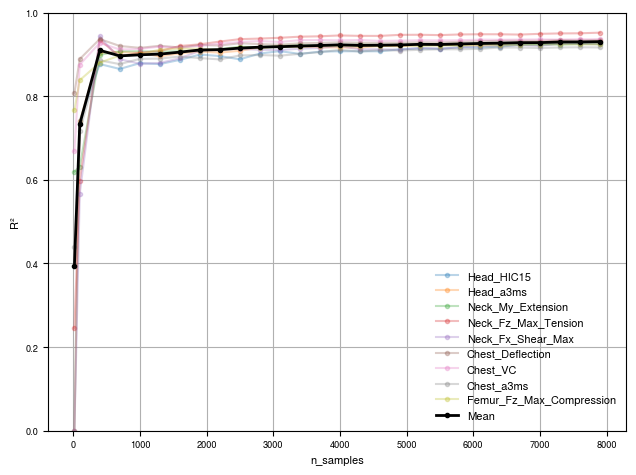

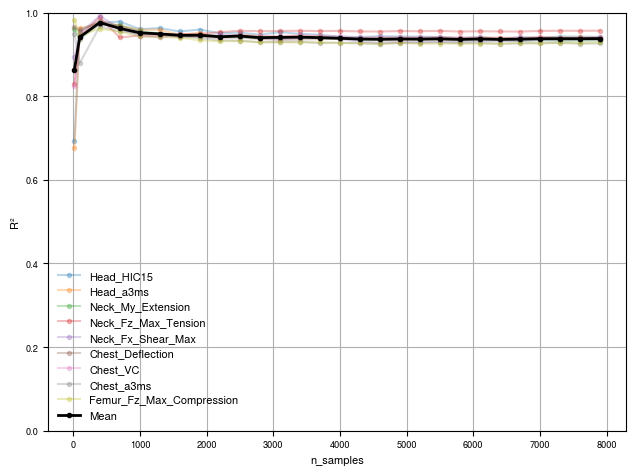

In [13]:
sobol_size_95 = load_loop(l_dir=Path("experiments/models/CNN/AdaptiveDOE/2024-12-27-18-53-00_knn_sampler_AnnUniversal_perc95"), rel_cols=SHARE_COLS)
sobol_size_95_train = load_loop(l_dir=Path("experiments/models/CNN/AdaptiveDOE/2024-12-27-18-53-00_knn_sampler_AnnUniversal_perc95"), rel_cols=SHARE_COLS, eval_pos=-2)

In [ ]:
def plot_95_comp():
    fig, ax = plt.subplots()

    ax.plot(sobol_size_95_train.index, sobol_size_95_train.mean(axis=1), label="Sobol Training", c="green")
    ax.plot(sobol_size_95.index, sobol_size_95.mean(axis=1), label="Sobol Validation", marker="o", c="green")

    ax.plot(sampler_1_train.index, sampler_1_train.mean(axis=1), label="Adaptive Sampling Training", c="red")
    ax.plot(sampler_1.index, sampler_1.mean(axis=1), label="Adaptive Sampling Validation", marker="o", c="red")

    ax.legend()
    ax.grid()
    ax.set_xlabel("n_samples")
    ax.set_ylabel("Mean of R²")
    ax.set_ylim(0, 1)

plot_95_comp()

SyntaxError: incomplete input (2449407690.py, line 16)

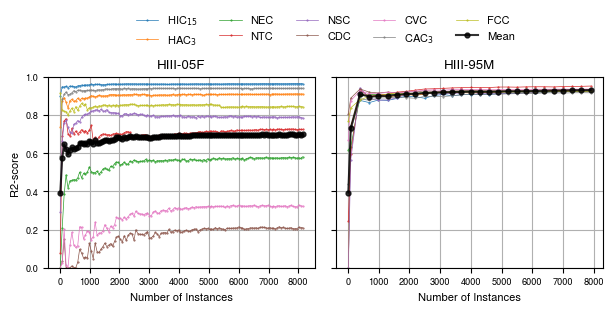

In [17]:
def plot_loop_2():
    fig, ax = plt.subplot_mosaic(mosaic=[["L", "L"], [5, 95]], layout="constrained", height_ratios=[0.1, 1])

    for perc in [5, 95]:
        if perc == 5:
            results = sobol_size_5
        else:
            results = sobol_size_95

        for col in SHARE_COLS:
            ax[perc].plot(results.index, results[col], label=RENAMER[col], marker=".", lw=0.5, markersize=1)
        ax[perc].plot(
            results.index, results[SHARE_COLS].mean(axis=1), label="Mean", c="black", lw=1.5, marker=".", markersize=7, alpha=0.8
        )

        ax[perc].axhline(0, color="black", lw=0.5)
        ax[perc].axhline(1, color="black", lw=0.5)
        ax[perc].set_xlabel("Number of Instances")

        ax[perc].set_ylim([0, 1])

        ax[perc].set_title(f"HIII-{perc:02d}{'F' if perc == 5 else 'M'}")
        ax[perc].grid()

    ax[5].set_ylabel("R2-score")
    ax[95].set_yticklabels([])
    ax["L"].axis("off")
    ax["L"].legend(*ax[5].get_legend_handles_labels(), loc="center", ncol=5)

    fig.set_figwidth(FULL_WIDTH)
    fig.set_figheight(FULL_WIDTH * 0.5)

    fig.savefig(FIG_DIR / "sampler.pdf")


plot_loop_2()

(0.0, 1.0)

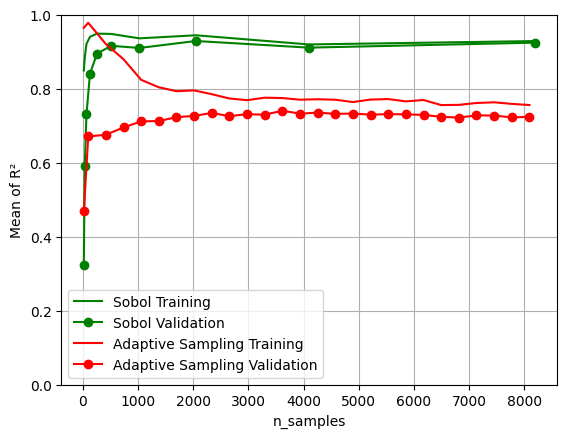

In [ ]:
def plot_05_comp():
    fig, ax = plt.subplots()

    ax.plot(sobol_size_95_train.index, sobol_size_95_train.mean(axis=1), label="Sobol Training", c="green")
    ax.plot(sobol_size_95.index, sobol_size_95.mean(axis=1), label="Sobol Validation", marker="o", c="green")

    ax.plot(sampler_2_train.index, sampler_2_train.mean(axis=1), label="Adaptive Sampling Training", c="red")
    ax.plot(sampler_2.index, sampler_2.mean(axis=1), label="Adaptive Sampling Validation", marker="o", c="red")


    ax.legend()
    ax.grid()
    ax.set_xlabel("n_samples")
    ax.set_ylabel("Mean of R²")
    ax.set_ylim(0, 1)

plot_05_comp()

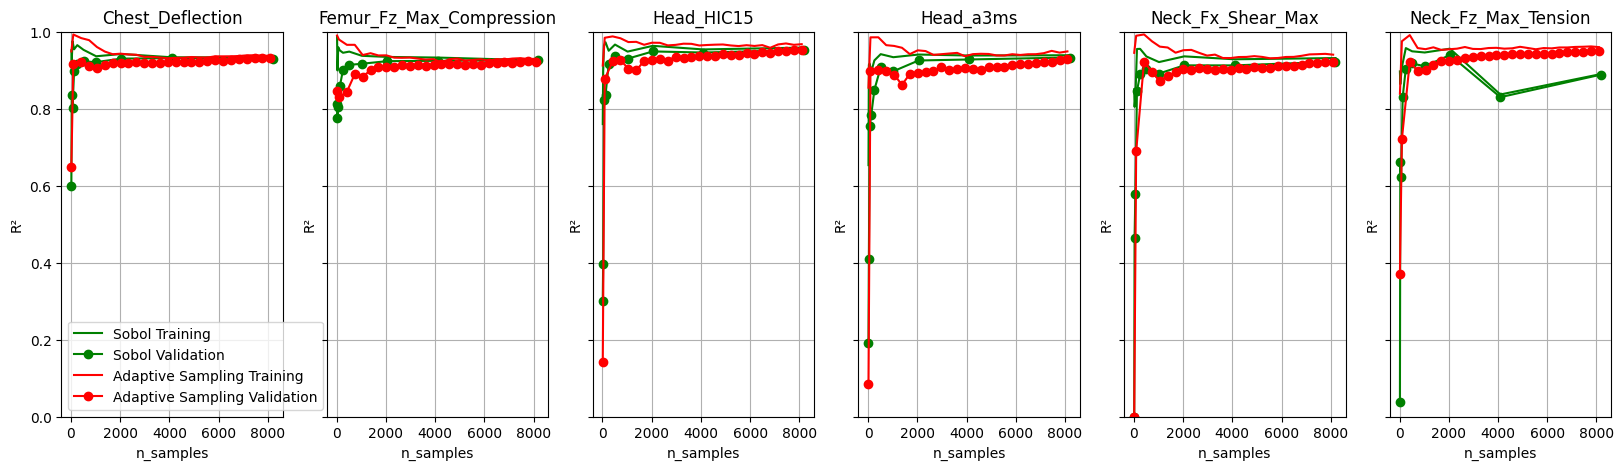

In [29]:
def single_channel(sob_val:pd.DataFrame, sob_train:pd.DataFrame ,samp_val:pd.DataFrame, samp_train:pd.DataFrame):
    fig, ax = plt.subplots(ncols=len(SHARE_COLS), sharex=True, sharey=True, figsize=(20, 5))
    for i, col in enumerate(SHARE_COLS):
        ax[i].plot(sob_train.index, sob_train[col], label="Sobol Training", c="green")
        ax[i].plot(sob_val.index, sob_val[col], label="Sobol Validation", marker="o", c="green")

        ax[i].plot(samp_train.index, samp_train[col], label="Adaptive Sampling Training", c="red")
        ax[i].plot(samp_val.index, samp_val[col], label="Adaptive Sampling Validation", marker="o", c="red")

        if i == 0:
            ax[i].legend()
        ax[i].grid()
        ax[i].set_xlabel("n_samples")
        ax[i].set_ylabel("R²")
        ax[i].set_ylim(0, 1)
        ax[i].set_title(col)

single_channel(sob_val=sobol_size_95, sob_train=sobol_size_95_train, samp_val=sampler_1, samp_train=sampler_1_train)

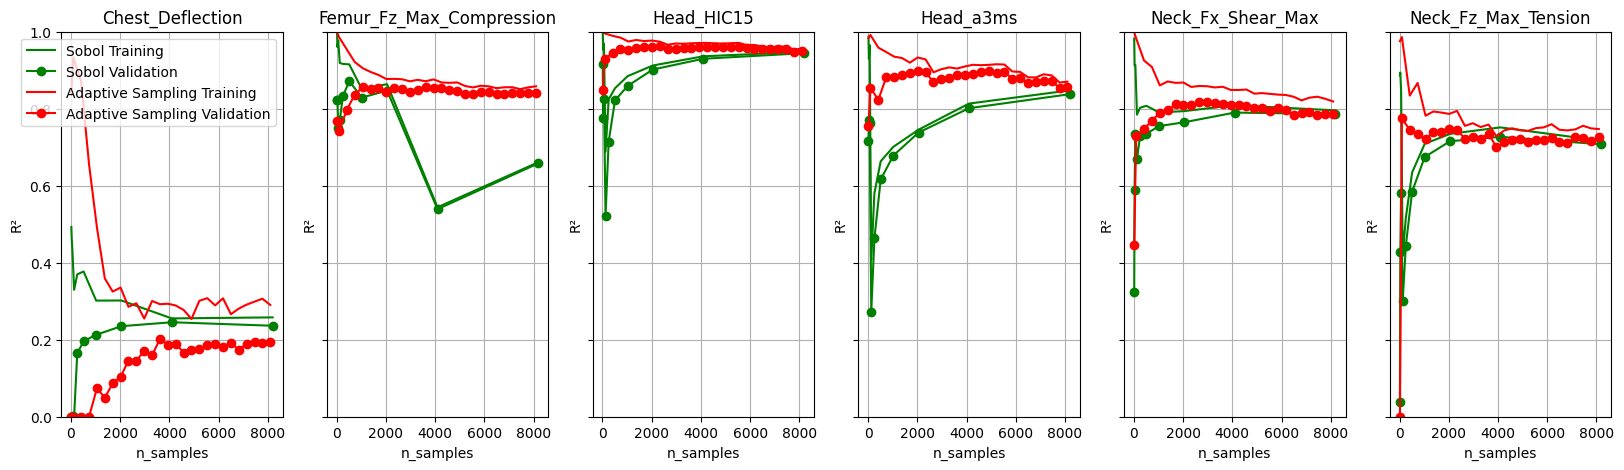

In [30]:
single_channel(sob_val=sobol_size_5, sob_train=sobol_size_5_train, samp_val=sampler_2, samp_train=sampler_2_train)

In [ ]:
def load_sampler(l_dir: Path, perc: Optional[int] = None):
    if perc is None:
        cases = sorted(l_dir.rglob(STR.fname_para))
    else:
        cases = sorted(x for x in l_dir.rglob(STR.fname_para) if f"{perc:02d}HIII" in x.parent.stem)

    paths = []
    lims = {
        "PAB_M_Scal": [0.9, 1.1],
        "PAB_Vent_T": [0.07, 0.13],
        "Pulse_Angle": [-10, 10],
        "Pulse_X_Scale": [0.8, 1.2],
        "SLL": [2140, 2540],
    }

    # doe
    doe = pd.read_parquet(
        "data/doe/doe_sobol_20240705_194200/doe_combined.parquet", filters=[(STR.perc, "==", 5 if perc is None else perc)]
    ).drop(columns=[STR.perc])
    trans = pd.read_parquet(
        "data/doe/doe_sobol_20240705_194200/sim_id_2_id.parquet", filters=[(STR.perc, "==", 5 if perc is None else perc)]
    ).drop(columns=[STR.perc])
    doe = doe.join(trans).set_index(STR.id)
    cols = sorted(doe.columns)
    r_path = Path("reports/figures/n_samples_eval")
    r_path.mkdir(parents=True, exist_ok=True)
    old_ids = []

    for cs in tqdm(sorted(cases, key=lambda x: len(json_util.load(f_path=x)[STR.id]))):
        ids = json_util.load(f_path=cs)[STR.id]
        new_ids = list(set(ids) - set(old_ids))
        fig, ax = plt.subplots(ncols=doe.shape[1], nrows=doe.shape[1], figsize=(20, 20), layout="constrained")
        fig.suptitle(f"n_samples: {len(ids)}")
        for row, col in product(range(doe.shape[1]), range(doe.shape[1])):
            ax[row, col].set_xlim(lims[cols[col]])
            if row != col:
                ax[row, col].grid()
                ax[row, col].set_ylim(lims[cols[row]])
                ax[row, col].scatter(doe[cols[col]].loc[old_ids], doe[cols[row]][old_ids], c="blue", marker=".", alpha=0.5)
                ax[row, col].scatter(doe[cols[col]].loc[new_ids], doe[cols[row]][new_ids], c="red")
            else:
                ax[row, col].hist(doe[cols[col]].loc[ids], color="gray")
            if col == 0:
                ax[row, col].set_ylabel(cols[row])
            if row == doe.shape[1] - 1:
                ax[row, col].set_xlabel(cols[col])

        old_ids = ids.copy()

        paths.append((r_path / (f"scatter_{l_dir.stem}_{len(ids)}" + ("_" if perc is None else f"{perc:02d}HIII"))).with_suffix(".png"))
        fig.savefig(paths[-1])
        plt.close(fig)

    frames = [Image.open(p) for p in paths]
    frames[0].save(
        (r_path / (f"scatter_{l_dir.stem}" + ("_" if perc is None else f"{perc:02d}HIII"))).with_suffix(".gif"),
        format="GIF",
        append_images=frames[1:],
        save_all=True,
        duration=300,
        loop=0,
    )

In [ ]:
load_sampler(l_dir=Path("experiments/2024-09-09-12-23-32_knn_sampler_loop_AnnUniversal_M4_S16_Stratmean_N8_P95"))
load_sampler(l_dir=B_DIR / "CNN" / "Sobol_Size", perc=5)
load_sampler(l_dir=B_DIR / "CNN" / "Sobol_Size", perc=95)